# 0712 머신러닝 모델 과제

## 과제 1 : RM변수와 LSTAT 변수로 price를 예측하도록 하는 각각 단순 선형 회귀 분석 후 결과 분석 

- Boston 주택 가격 데이터 이용

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

In [3]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_df['Price'] = pd.DataFrame(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
price = boston_df[['Price']]
rm = boston_df[['RM']]
lstat = boston_df[['LSTAT']]

In [6]:
import statsmodels.api as sm

In [7]:
rm1 = sm.add_constant(rm, has_constant = 'add')
lstat1 = sm.add_constant(lstat, has_constant = 'add')

In [9]:
model1 = sm.OLS(price, rm1)
fitted_model1 = model1.fit()

model2 = sm.OLS(price, lstat1)
fitted_model2 = model2.fit()

In [10]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.49e-74
Time:                        23:33:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           5.08e-88
Time:                        23:33:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
pred1 = fitted_model1.predict(rm1)

pred2 = fitted_model2.predict(lstat1)

In [13]:
import matplotlib.pyplot as plt

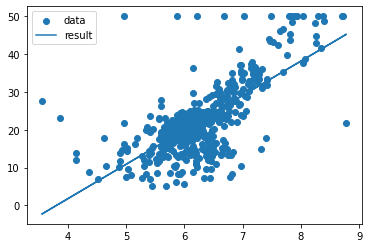

In [14]:
plt.scatter(rm, price, label = 'data')
plt.plot(rm, pred1, label = 'result')
plt.legend()
plt.show()

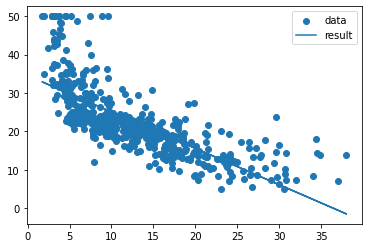

In [19]:
plt.scatter(lstat, price, label = 'data')
plt.plot(lstat, pred2, label = 'result')
plt.legend()
plt.show()

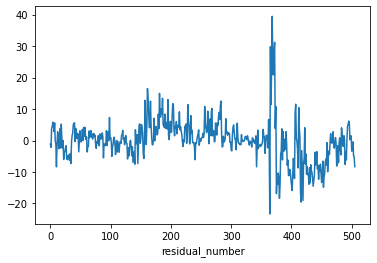

In [20]:
fitted_model1.resid.plot()
plt.xlabel('residual_number')
plt.show()

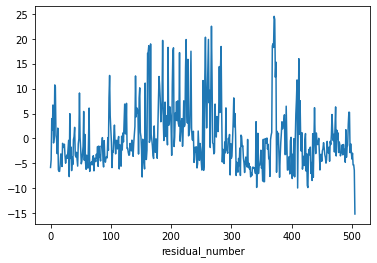

In [21]:
fitted_model2.resid.plot()
plt.xlabel('residual_number')
plt.show()

## 과제 2 : CRIM, RM, LSTAT 세개 변수로 다중선형회귀 적합한 결과와 각각의 변수를 단순선형회귀 적합한 모델의 회귀 계수를 비교

- Boston 주택 가격 데이터 이용

In [22]:
crim = boston_df[['CRIM']]
rm = boston_df[['RM']]
lstat = boston_df[['LSTAT']]

In [23]:
x_data = boston_df[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [24]:
crim1 = sm.add_constant(crim, has_constant = 'add')
rm1 = sm.add_constant(rm, has_constant = 'add')
lstat1 = sm.add_constant(lstat, has_constant = 'add')

In [25]:
x_data1 = sm.add_constant(x_data, has_constant = 'add')

In [26]:
model1 = sm.OLS(price, crim1)
fitted_model1 = model1.fit()

model2 = sm.OLS(price, rm1)
fitted_model2 = model2.fit()

model3 = sm.OLS(price, lstat1)
fitted_model3 = model3.fit()

In [27]:
multi_model = sm.OLS(price, x_data1)
fitted_multi_model = multi_model.fit()

In [28]:
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [29]:
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


## 과제 3 : 다중공선성과 회귀모델의 성능 확인

- CRIM, RM, LSTAT, B, TAX, AGE, ZN, NOX, INDUS 변수로 데이터를 분할하여 회귀 모형 생성 후 성능 확인
- 다중공선성을 확인하여 변수 제거 후 성능 비교
- Boston 주택 가격 데이터 이용

In [30]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 과제 3-1 : CRIM, RM, LSTAT, B, TAX, AGE, ZN, NOX, INDUS 변수로 데이터를 분할하여 회귀 모형 생성 후 성능 확인

In [31]:
x_data = boston_df[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296.0,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242.0,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242.0,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222.0,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222.0,54.2,0.0,0.458,2.18


In [32]:
x_data2 = sm.add_constant(x_data, has_constant = 'add')

In [33]:
multi_model = sm.OLS(price, x_data2)
fitted_multi_model = multi_model.fit()

In [34]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          5.76e-111
Time:                        23:51:32   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
fitted_multi_model.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

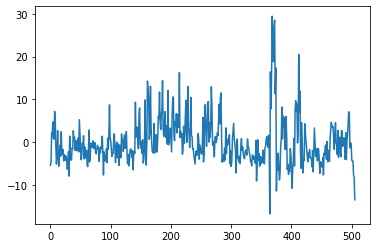

In [37]:
fitted_multi_model.resid.plot()
plt.show()

### 과제 3-2 : 다중공선성 확인

#### 과제 3-2-1 :  상관계수 / 산점도를 통해...

In [38]:
x_data.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


In [39]:
import seaborn as sns

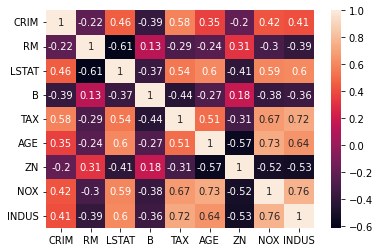

In [41]:
sns.heatmap(x_data.corr(), annot = True)
plt.show()

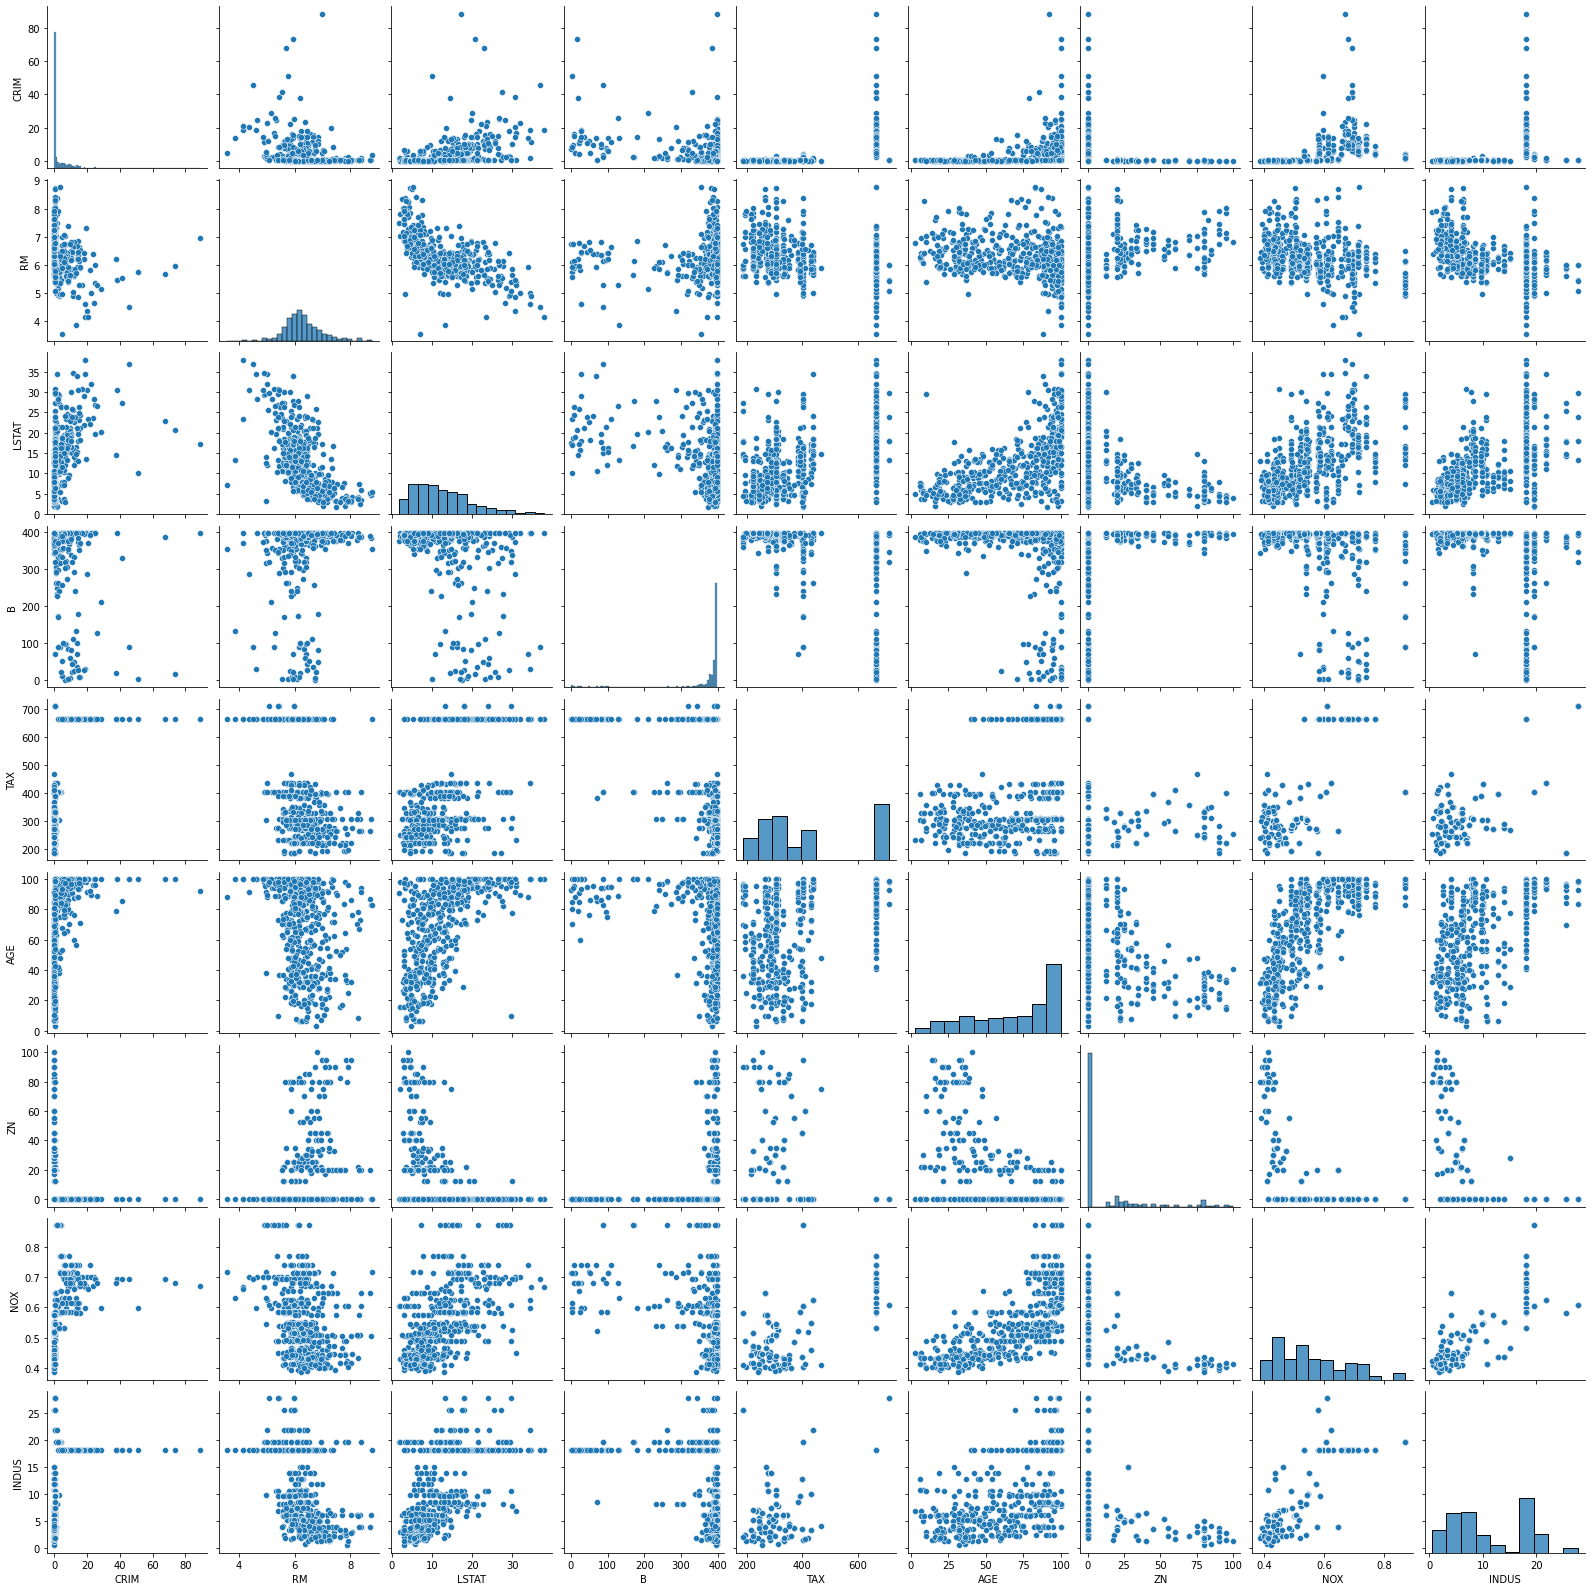

In [42]:
sns.pairplot(x_data)
plt.show()

#### 과제 3-2-2 : VIF를 통한 다중공선성 확인

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif['features'] = x_data.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [46]:
vif = pd.DataFrame()
x_data2 = x_data.drop('NOX', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [47]:
vif = pd.DataFrame()
x_data3 = x_data2.drop('RM', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [48]:
vif = pd.DataFrame()
x_data4 = x_data3.drop('TAX', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,1.632526,CRIM
1,7.792738,LSTAT
2,6.930725,B
3,13.259585,AGE
4,1.651789,ZN
5,7.578961,INDUS


In [49]:
vif = pd.DataFrame()
x_data5 = x_data4.drop('AGE', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif['features'] = x_data5.columns
vif

,VIF Factor,features
0,1.620427,CRIM
1,6.515147,LSTAT
2,4.811292,B
3,1.577093,ZN
4,6.224923,INDUS


In [51]:
x_data6 = sm.add_constant(x_data5, has_constant = 'add')
model_vif = sm.OLS(price, x_data6)
fitted_model_vif = model_vif.fit()

In [52]:
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     124.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.52e-85
Time:                        00:02:14   Log-Likelihood:                -1635.9
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     500   BIC:                             3309.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3280      1.625     19.277      0.000      28.135      34.521
CRIM          -0.0505      0.038     -1.341      0.181      -0.124       0.023
LSTAT         -0.8541      0.051    -16.612      0.000      -0.955      -0.753
B              0.0058      0.003      1.723      0.086      -0.001       0.012
ZN             0.0241      0.014      1.712      0.088      -0.004       0.052
INDUS         -0.0144      0.056     -0.257      0.797      -0.125       0.096
==============================================================================
Omnibus:                      154.534   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.445
Skew:                           1.564   Prob(JB):                     4.90e-82
Kurtosis:                       5.825   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 과제 3-2-3 : 학습 / 검증데이터 분할 

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X5 = x_data5
y5 = price
x5_train, x5_test, y5_train, y5_test = train_test_split(X5, y5,
                                                       train_size = 0.7, test_size = 0.3,
                                                       random_state = 102)

x5_train2 = sm.add_constant(x5_train, has_constant = 'add')
fit_2 = sm.OLS(y5_train, x5_train2)
fit_2 = fit_2.fit()

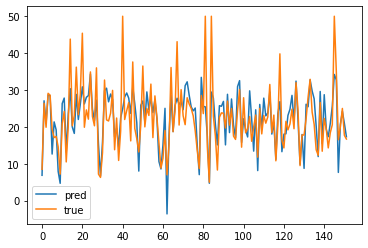

In [57]:
x5_test2 = sm.add_constant(x5_test, has_constant = 'add')
plt.plot(np.array(fit_2.predict(x5_test2)), label = 'pred')
plt.plot(np.array(y5_test), label = 'true')
plt.legend()
plt.show()